### Exploratory data analyis of dividend capture strategy
for the S&P 500, starting in 2010

by Flor Lozano-Byrne

In [1]:
import pandas as pd
import dill
from datetime import datetime, timedelta,date

In [2]:
d = dill.load(open('data/d_all_EOD.pkd', 'rb'))
for ticker in d.keys():
    d[ticker] = d[ticker].reset_index(drop = True)
    

### Find stocks that currently pay dividends

In [3]:
divs = []
for ticker in d.keys():
    df = d[ticker].copy(deep=True)
    df = df[df.date > datetime(2022,11,1)]
    if [x for x in df['divCash'].values if x>0]:
        divs.append(ticker)
print(len(divs))
divs

397


['BALL',
 'BBWI',
 'TECH',
 'BX',
 'BRO',
 'BG',
 'CPT',
 'COR',
 'CTRA',
 'ELV',
 'EQT',
 'EG',
 'FDS',
 'GEN',
 'HUBB',
 'INVH',
 'KDP',
 'MPWR',
 'NDSN',
 'NXPI',
 'PARA',
 'RVTY',
 'STLD',
 'TRGP',
 'VTRS',
 'VICI',
 'WTW',
 'SPY',
 'ABT',
 'ABBV',
 'ACN',
 'AES',
 'AFL',
 'A',
 'APD',
 'ALB',
 'ARE',
 'ALLE',
 'LNT',
 'ALL',
 'MO',
 'AMCR',
 'AEE',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'AON',
 'AOS',
 'APA',
 'AAPL',
 'AMAT',
 'ADM',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADP',
 'AVB',
 'AVY',
 'BKR',
 'BAC',
 'BK',
 'BAX',
 'BDX',
 'BBY',
 'BLK',
 'BWA',
 'BXP',
 'BMY',
 'AVGO',
 'BR',
 'CHRW',
 'CPB',
 'COF',
 'CAH',
 'CARR',
 'CAT',
 'CBOE',
 'CDW',
 'CE',
 'CNP',
 'CF',
 'SCHW',
 'CVX',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG',
 'COP',
 'ED',
 'STZ',
 'COO',
 'GLW',
 'CTVA',
 'COST',
 'CCI',
 'CSX',
 'CMI',
 'CVS',
 'DHI',
 'DHR',
 'DRI',
 'DE',
 '

### Case 1: Maximum Gain
Total gains in the last 13 years, buying at the low the day before the ex-dividend and selling at the high the day after the ex-dividend

In [4]:
def record_gains(startdate = datetime(2010,1,1), max_gain = True):
    dicts = []
    for ticker in divs:
        gain_ct = 0
        loss_ct = 0
        gain_tot = 0
        loss_tot = 0
        net = 0
        df = d[ticker]
        df = df[df.date > startdate]
        df1 = df[df['divCash']>0]
        for index, row in df1.iterrows():
            df2 = df.loc[index - 1:index + 1]
            if len(df2) != 3:
                print('incorrect dataframe length: {} for ticker {}'.format(len(df2),ticker))
                continue
            if max_gain:
                change = df2.high.values[2] - df2.low.values[0]
            else:
                highs = df2.high.values
                lows = df2.low.values
                change = (highs[2] - highs[0] - lows[2] + lows[0])/2
            div = df2.divCash.values[1]
            gain = change + div
            if gain > 0:
                gain_ct +=1
                gain_tot += gain
            else:
                loss_ct +=1
                loss_tot += gain
            net += gain
        dicts.append({'ticker':ticker
                  , 'gain_ct': gain_ct
                 , 'gain_tot': gain_tot
                 , 'loss_ct': loss_ct
                 , 'loss_tot': loss_tot
                 , 'net': net})
    return pd.DataFrame(dicts).sort_values('net').reset_index(drop=True)
max_gains = record_gains()
max_gains

incorrect dataframe length: 2 for ticker AMP
incorrect dataframe length: 2 for ticker BKR
incorrect dataframe length: 2 for ticker BKR
incorrect dataframe length: 2 for ticker C
incorrect dataframe length: 2 for ticker CMCSA
incorrect dataframe length: 2 for ticker ETN
incorrect dataframe length: 2 for ticker GL
incorrect dataframe length: 2 for ticker JPM
incorrect dataframe length: 2 for ticker KHC


,ticker,gain_ct,gain_tot,loss_ct,loss_tot,net
0,KVUE,1,0.26000,0,0.0000,0.26000
1,VTRS,8,1.70250,2,-0.4750,1.22750
2,LH,4,6.25000,2,-4.2500,2.00000
3,GEHC,3,2.66330,0,0.0000,2.66330
4,T,8,3.65440,4,-0.4885,3.16590
...,...,...,...,...,...,...
392,MA,49,355.40710,7,-5.8950,349.51210
393,GWW,50,408.27600,5,-19.1740,389.10200
394,EQIX,34,424.98684,3,-29.1811,395.80574
395,LRCX,33,469.69790,5,-32.8225,436.87540


In [6]:
max_gains[max_gains.gain_ct<max_gains.loss_ct]


,ticker,gain_ct,gain_tot,loss_ct,loss_tot,net


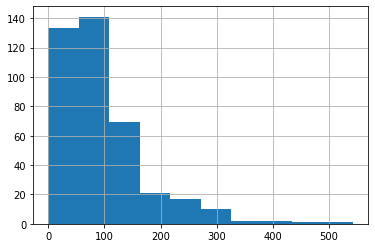

In [7]:
max_gains.net.hist()

### Case 2: Maximum Gain in the last year

In [8]:
STARTDATE = datetime(2022,10,26)

In [50]:
latest_max_gains = record_gains(startdate = STARTDATE)
latest_max_gains

incorrect dataframe length: 2 for ticker AMP
incorrect dataframe length: 2 for ticker BKR
incorrect dataframe length: 2 for ticker CARR
incorrect dataframe length: 2 for ticker C
incorrect dataframe length: 2 for ticker COST
incorrect dataframe length: 2 for ticker ETN


,ticker,gain_ct,gain_tot,loss_ct,loss_tot,net
0,UHS,3,9.8150,1,-12.3500,-2.5350
1,ES,1,0.1350,3,-1.6900,-1.5550
2,WYNN,1,0.5800,1,-1.5400,-0.9600
3,DVN,2,0.5182,2,-1.0751,-0.5569
4,FRT,2,3.1600,2,-3.6850,-0.5250
...,...,...,...,...,...,...
392,KLAC,4,68.8300,0,0.0000,68.8300
393,POOL,4,73.8100,0,0.0000,73.8100
394,INTU,4,90.0600,0,0.0000,90.0600
395,MPWR,4,99.7750,0,0.0000,99.7750


In [51]:
### Companies that lost using this strategy in the last year
latest_max_gains[latest_max_gains.net < 0]

,ticker,gain_ct,gain_tot,loss_ct,loss_tot,net
0,UHS,3,9.8150,1,-12.3500,-2.5350
1,ES,1,0.1350,3,-1.6900,-1.5550
2,WYNN,1,0.5800,1,-1.5400,-0.9600
3,DVN,2,0.5182,2,-1.0751,-0.5569
4,FRT,2,3.1600,2,-3.6850,-0.5250


In [52]:
### How the losing companies last years did over the last 13 years
max_gains[max_gains.ticker.isin(latest_max_gains[latest_max_gains.net < 0].ticker.values)]

,ticker,gain_ct,gain_tot,loss_ct,loss_tot,net
134,DVN,45,64.6984,12,-9.14010,55.55830
146,ES,48,63.2445,10,-4.62875,58.61575
254,FRT,47,121.9724,9,-20.53510,101.43730
319,UHS,49,149.3199,4,-14.40000,134.91990
321,WYNN,35,152.0353,8,-14.70950,137.32580


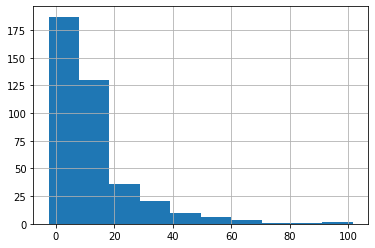

In [53]:
### Distributiion of net gains
latest_max_gains.net.hist()

### Case 3: Average Gain
Total gains in the last 13 years, assuming buys at the midpoint between high and low the day before the ex-dividend and selling at the midpoint between high and low the day after the ex-dividend

In [54]:
avg_gains = record_gains(max_gain = False)
avg_gains

incorrect dataframe length: 2 for ticker AMP
incorrect dataframe length: 2 for ticker BKR
incorrect dataframe length: 2 for ticker BKR
incorrect dataframe length: 2 for ticker C
incorrect dataframe length: 2 for ticker CMCSA
incorrect dataframe length: 2 for ticker ETN
incorrect dataframe length: 2 for ticker GL
incorrect dataframe length: 2 for ticker JPM
incorrect dataframe length: 2 for ticker KHC


,ticker,gain_ct,gain_tot,loss_ct,loss_tot,net
0,MPWR,18,9.67330,21,-25.41290,-15.73960
1,POOL,37,25.87620,18,-41.12025,-15.24405
2,NVDA,6,5.60345,6,-16.37205,-10.76860
3,GE,6,1.68090,6,-1.98310,-0.30220
4,CEG,4,1.35350,3,-1.56950,-0.21600
...,...,...,...,...,...,...
392,PSA,55,101.29950,1,-2.69750,98.60200
393,EQIX,32,112.34044,5,-9.77780,102.56264
394,KDP,50,122.21950,5,-0.72750,121.49200
395,LMT,55,123.71545,0,0.00000,123.71545


In [55]:
avg_gains[avg_gains.net < 0]

,ticker,gain_ct,gain_tot,loss_ct,loss_tot,net
0,MPWR,18,9.67330,21,-25.41290,-15.73960
1,POOL,37,25.87620,18,-41.12025,-15.24405
2,NVDA,6,5.60345,6,-16.37205,-10.76860
3,GE,6,1.68090,6,-1.98310,-0.30220
4,CEG,4,1.35350,3,-1.56950,-0.21600
5,PAYC,1,0.95500,1,-1.15510,-0.20010


In [56]:
max_gains[max_gains.ticker.isin(avg_gains[avg_gains.net < 0].ticker.values)]

,ticker,gain_ct,gain_tot,loss_ct,loss_tot,net
30,PAYC,2,17.2298,0,0.0000,17.2298
32,CEG,6,19.1490,1,-0.4885,18.6605
61,GE,11,29.1306,1,-0.6400,28.4906
312,NVDA,11,145.3096,1,-15.1200,130.1896
382,MPWR,37,279.4469,2,-1.0400,278.4069
390,POOL,52,328.1517,3,-3.9550,324.1967


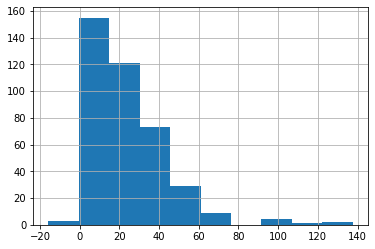

In [57]:
avg_gains.net.hist()

### Case 4: Average gain in the last year

In [58]:
latest_avg_gains = record_gains(startdate = STARTDATE, max_gain=False)
latest_avg_gains

incorrect dataframe length: 2 for ticker AMP
incorrect dataframe length: 2 for ticker BKR
incorrect dataframe length: 2 for ticker CARR
incorrect dataframe length: 2 for ticker C
incorrect dataframe length: 2 for ticker COST
incorrect dataframe length: 2 for ticker ETN


,ticker,gain_ct,gain_tot,loss_ct,loss_tot,net
0,AON,2,1.670000,3,-16.90440,-15.234400
1,CMA,1,0.042500,3,-7.97000,-7.927500
2,MPWR,0,0.000000,4,-5.77750,-5.777500
3,ALB,1,1.249950,3,-6.50360,-5.253650
4,PH,1,1.035000,3,-3.80640,-2.771400
...,...,...,...,...,...,...
392,PXD,4,19.340500,0,0.00000,19.340500
393,NDSN,3,21.417600,1,-1.04995,20.367650
394,BLK,4,24.828450,0,0.00000,24.828450
395,AVGO,4,26.530050,0,0.00000,26.530050


In [59]:
latest_avg_gains[latest_avg_gains.net < 0]

,ticker,gain_ct,gain_tot,loss_ct,loss_tot,net
0,AON,2,1.670000,3,-16.904400,-15.23440
1,CMA,1,0.042500,3,-7.970000,-7.92750
2,MPWR,0,0.000000,4,-5.777500,-5.77750
3,ALB,1,1.249950,3,-6.503600,-5.25365
4,PH,1,1.035000,3,-3.806400,-2.77140
5,COO,0,0.000000,2,-2.471250,-2.47125
6,SPGI,1,0.060000,3,-2.235000,-2.17500
7,CF,1,1.005000,3,-2.622500,-1.61750
8,AMP,2,1.700000,2,-3.270000,-1.57000
9,EFX,2,0.802500,2,-2.297500,-1.49500


In [60]:
max_gains[max_gains.ticker.isin(latest_avg_gains[latest_avg_gains.net < 0].ticker.values)]

,ticker,gain_ct,gain_tot,loss_ct,loss_tot,net
30,PAYC,2,17.229800,0,0.000000,17.229800
33,APH,11,19.885000,2,-0.605000,19.280000
52,MGM,20,27.651600,4,-2.150000,25.501600
61,GE,11,29.130600,1,-0.640000,28.490600
85,HRL,53,40.905000,3,-0.882500,40.022500
87,DAL,28,40.513500,1,-0.287500,40.226000
128,XRAY,49,55.339900,6,-1.670000,53.669900
164,XYL,40,71.770000,8,-6.060600,65.709400
167,STLD,51,68.574700,4,-1.465200,67.109500
188,PGR,31,74.625600,1,-0.260000,74.365600


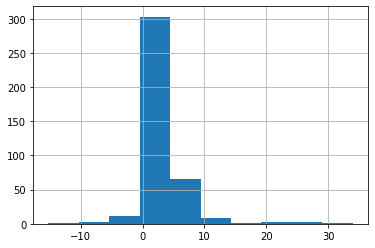

In [61]:
latest_avg_gains.net.hist()

### Portfolio Analysis
Comparing holding SPY ETF vs switching to capture dividends for 3 days and switching back to SPY

In [62]:
d['SPY'][d['SPY'].date > STARTDATE]

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
3227,2022-10-27,379.98,385.000,379.3300,383.07,81971756,374.031927,378.973346,373.392102,377.073558,81971756,0.0,1.0
3228,2022-10-28,389.02,389.520,379.6800,379.87,100301958,382.930418,383.422592,373.736623,373.923649,100301958,0.0,1.0
3229,2022-10-31,386.21,388.400,385.2600,386.44,96631258,380.164405,382.320124,379.229276,380.390805,96631258,0.0,1.0
3230,2022-11-01,384.52,390.390,383.2900,390.14,85407598,378.500860,384.278973,377.290114,384.032886,85407598,0.0,1.0
3231,2022-11-02,374.87,388.630,374.7600,383.90,126990356,369.001917,382.546523,368.893639,377.890565,126990356,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3479,2023-10-30,415.59,416.680,412.2200,413.56,86562675,415.590000,416.680000,412.220000,413.560000,86562675,0.0,1.0
3480,2023-10-31,418.20,418.530,414.2100,416.18,79665150,418.200000,418.530000,414.210000,416.180000,79665150,0.0,1.0
3481,2023-11-01,422.66,423.500,418.6499,419.20,98068115,422.660000,423.500000,418.649900,419.200000,98068115,0.0,1.0
3482,2023-11-02,430.76,430.915,426.5600,426.58,94938909,430.760000,430.915000,426.560000,426.580000,94938909,0.0,1.0


In [9]:
### Holding SPY, buying at the close, final value at the close
def calc_spy():
    n_shares = 100
    df = d['SPY'][d['SPY'].date > STARTDATE]
    entry = n_shares * df.iloc[0].adjClose
    print('Original Investment: {}'.format(entry))
    exit = n_shares * df.iloc[-1].adjClose
    profit = exit - entry
    print('Profit: {}%'.format(profit/entry*100))
    return entry
orig_invest = calc_spy()

Original Investment: 37403.19273072
Profit: 16.21735158533145%


In [10]:
def create_dc_sched(startdate, max_gain):
    dicts = []
    df_divs = pd.DataFrame()
    for ticker in divs:
        gain_tot = 0
        loss_tot = 0
        net = 0
        df = d[ticker]
        df = df[df.date > startdate]
        df1 = df[df['divCash']>0]
        df1['ticker'] = ticker
        df_divs =df_divs.append(df1)
    return df_divs.sort_values('date')
        
df_divs = create_dc_sched(STARTDATE, True)

/home/flor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/flor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/flor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

/home/flor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/flor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/flor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

/home/flor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/flor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/flor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

/home/flor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/flor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/flor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

/home/flor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/flor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/flor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

/home/flor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/flor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/flor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

/home/flor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/flor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/flor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

/home/flor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/flor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/flor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

/home/flor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/flor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/flor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

/home/flor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/flor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/flor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

/home/flor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/flor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/flor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

/home/flor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/flor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/flor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

/home/flor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/flor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/flor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

/home/flor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/flor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/flor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

/home/flor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/flor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/flor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

/home/flor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/flor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/flor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [11]:
df_divs.to_csv('dividends.csv')

In [12]:
### Too many each day, need to choose
df_divs

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,ticker
658,2022-10-27,37.88,38.5900,37.530,38.05,7529894,37.252137,37.950369,36.907938,37.419319,7529894,0.150,1.0,CARR
3227,2022-10-27,496.54,503.0100,494.140,499.81,1576567,492.807491,499.228856,490.425532,496.052910,1576567,0.900,1.0,COST
3228,2022-10-28,54.38,54.4850,51.920,51.96,1063284,53.179051,53.281732,50.773379,50.812495,1063284,0.300,1.0,AOS
3228,2022-10-28,82.22,82.2950,79.510,80.27,7816061,79.167709,79.239925,76.558314,77.290100,7816061,0.775,1.0,MS
3228,2022-10-28,96.10,96.3750,93.660,94.49,858656,93.809202,94.077647,91.427366,92.237581,858656,0.700,1.0,CE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3482,2023-11-02,555.97,559.5100,552.010,556.50,2100573,555.970000,559.510000,552.010000,556.500000,2100573,1.020,1.0,COST
1595,2023-11-03,35.19,35.5400,34.945,35.53,5519138,35.190000,35.540000,34.945000,35.530000,5519138,0.200,1.0,BKR
3483,2023-11-03,335.74,340.2600,334.250,334.29,708067,335.740000,340.260000,334.250000,334.290000,708067,1.350,1.0,AMP
3483,2023-11-03,214.79,219.5399,214.715,218.71,1852921,214.790000,219.539900,214.715000,218.710000,1852921,0.860,1.0,ETN


In [13]:
### For each day, choose the ticker with the highest historical gains
def trades(start_amount, max_gain=True):
    curr_val = start_amount
    avail_amts = [curr_val / 3] * 3
    total = 0
    curr_avail_index = 0
    selected_tickers = []
    for date in df_divs.date.unique():
        if curr_avail_index > 2:
            curr_avail_index = 0
        df1 = df_divs[df_divs.date == date]
        tickers = df1.ticker.values
        d_indexes ={}
        for ticker in tickers:
            d_indexes[ticker] = max_gains[max_gains.ticker == ticker].index[0]    
        selected_ticker = sorted([x for x in d_indexes.items()], key=lambda x:x[1], reverse=True)[0][0]
        df2 = d[selected_ticker]
        print(date, selected_ticker)
        idx = df2[df2.date == date].index[0]
        df2 = df2.loc[idx - 1:idx + 1]
        if len(df2) == 3:
            selected_tickers.append(selected_ticker)
            if max_gain:
                entry_price = df2.low.values[0]
                gain = df2.high.values[2] - entry_price + df2.divCash.values[1]
            else:
                highs = df2.high.values
                lows = df2.low.values
                entry_price = (highs[0] + lows[0]) / 2
                gain = (highs[2] + lows[2]) / 2 - entry_price + df2.divCash.values[1]
            n_shares = avail_amts[curr_avail_index] // entry_price
            gain *= n_shares
            avail_amts[curr_avail_index] += gain
            total += gain
            print('Number of shares: {}, Gain {}'.format(n_shares,gain))
            print(avail_amts, sum(avail_amts))
            curr_avail_index += 1
    print('Total gains: {}'.format(total))
    print('Percent return: {}%'.format(total/start_amount * 100))
    dill.dump(selected_tickers,open('dividend_tickers.pkd','wb'))
trades(orig_invest)

2022-10-27T00:00:00.000000000 COST
Number of shares: 25.0, Gain 450.75000000000125
[12918.480910240003, 12467.730910240001, 12467.730910240001] 37853.94273072001
2022-10-28T00:00:00.000000000 CE
Number of shares: 130.0, Gain 250.90000000000052
[12918.480910240003, 12718.630910240001, 12467.730910240001] 38104.84273072
2022-10-31T00:00:00.000000000 AON
Number of shares: 45.0, Gain 634.5540000000002
[12918.480910240003, 12718.630910240001, 13102.284910240001] 38739.39673072001
2022-11-01T00:00:00.000000000 MKTX
Number of shares: 53.0, Gain -111.3000000000006
[12807.180910240002, 12718.630910240001, 13102.284910240001] 38628.096730720004
2022-11-02T00:00:00.000000000 CAG
Number of shares: 350.0, Gain 36.74999999999951
[12807.180910240002, 12755.380910240001, 13102.284910240001] 38664.846730720004
2022-11-03T00:00:00.000000000 NSC
Number of shares: 58.0, Gain 572.4599999999997
[12807.180910240002, 12755.380910240001, 13674.74491024] 39237.30673072
2022-11-04T00:00:00.000000000 AMP
Number o

2023-01-26T00:00:00.000000000 LEN
Number of shares: 223.0, Gain 918.760000000001
[23421.213010240008, 22013.852710239997, 22793.639910240003] 68228.70563072001
2023-01-27T00:00:00.000000000 OKE
Number of shares: 340.0, Gain 69.69999999999999
[23490.91301024001, 22013.852710239997, 22793.639910240003] 68298.40563072001
2023-01-30T00:00:00.000000000 TXN
Number of shares: 128.0, Gain 853.7600000000009
[23490.91301024001, 22867.61271024, 22793.639910240003] 69152.16563072
2023-01-31T00:00:00.000000000 AON
Number of shares: 71.0, Gain 403.9899999999997
[23490.91301024001, 22867.61271024, 23197.62991024] 69556.15563072001
2023-02-01T00:00:00.000000000 FAST
Number of shares: 475.0, Gain 2980.625000000002
[26471.53801024001, 22867.61271024, 23197.62991024] 72536.78063072001
2023-02-02T00:00:00.000000000 COST
Number of shares: 45.0, Gain 797.8499999999966
[26471.53801024001, 23665.462710239994, 23197.62991024] 73334.63063072
2023-02-03T00:00:00.000000000 COF
Number of shares: 197.0, Gain 620.54

2023-05-17T00:00:00.000000000 AMGN
Number of shares: 156.0, Gain -134.16000000000145
[40734.71991023999, 35434.77149024, 39704.60391024001] 115874.09531071999
2023-05-18T00:00:00.000000000 WHR
Number of shares: 310.0, Gain 2281.600000000004
[40734.71991023999, 35434.77149024, 41986.203910240016] 118155.69531072
2023-05-19T00:00:00.000000000 PSX
Number of shares: 434.0, Gain 1631.8400000000033
[42366.559910239994, 35434.77149024, 41986.203910240016] 119787.53531072
2023-05-22T00:00:00.000000000 NDSN
Number of shares: 164.0, Gain 1004.4999999999991
[42366.559910239994, 36439.27149024, 41986.203910240016] 120792.03531072
2023-05-23T00:00:00.000000000 EQIX
Number of shares: 58.0, Gain -1317.1800000000003
[42366.559910239994, 36439.27149024, 40669.023910240016] 119474.85531072001
2023-05-24T00:00:00.000000000 EFX
Number of shares: 202.0, Gain -133.31999999999655
[42233.239910239994, 36439.27149024, 40669.023910240016] 119341.53531072
2023-05-25T00:00:00.000000000 SPGI
Number of shares: 102.

2023-08-30T00:00:00.000000000 FDS
Number of shares: 117.0, Gain 1737.4500000000005
[62884.21091023997, 52009.19069024, 64738.79271024] 179632.19431071996
2023-08-31T00:00:00.000000000 MLM
Number of shares: 145.0, Gain 2541.125000000003
[62884.21091023997, 52009.19069024, 67279.91771024] 182173.31931071996
2023-09-01T00:00:00.000000000 SWK
Number of shares: 666.0, Gain 1005.6600000000019
[63889.87091023997, 52009.19069024, 67279.91771024] 183178.97931071997
2023-09-05T00:00:00.000000000 PXD
Number of shares: 217.0, Gain 1712.1299999999962
[63889.87091023997, 53721.32069024, 67279.91771024] 184891.10931071997
2023-09-06T00:00:00.000000000 NVDA
Number of shares: 140.0, Gain -2116.800000000004
[63889.87091023997, 53721.32069024, 65163.117710239996] 182774.30931071995
2023-09-07T00:00:00.000000000 BLK
Number of shares: 92.0, Gain 906.4299999999967
[64796.30091023997, 53721.32069024, 65163.117710239996] 183680.73931071995
2023-09-08T00:00:00.000000000 UNH
Number of shares: 112.0, Gain 797.43

In [87]:
orig_invest

37403.19273072

In [88]:
trades(orig_invest, max_gain = False)

2022-10-27T00:00:00.000000000 COST
Number of shares: 24.0, Gain 89.76000000000076
[12557.490910240002, 12467.730910240001, 12467.730910240001] 37492.952730720004
2022-10-28T00:00:00.000000000 CE
Number of shares: 129.0, Gain 21.955800000000703
[12557.490910240002, 12489.686710240003, 12467.730910240001] 37514.90853072001
2022-10-31T00:00:00.000000000 AON
Number of shares: 44.0, Gain 142.3663999999989
[12557.490910240002, 12489.686710240003, 12610.09731024] 37657.27493072001
2022-11-01T00:00:00.000000000 MKTX
Number of shares: 51.0, Gain -500.820000000002
[12056.67091024, 12489.686710240003, 12610.09731024] 37156.45493072001
2022-11-02T00:00:00.000000000 CAG
Number of shares: 341.0, Gain -138.95749999999902
[12056.67091024, 12350.729210240004, 12610.09731024] 37017.49743072
2022-11-03T00:00:00.000000000 NSC
Number of shares: 54.0, Gain 154.0349999999991
[12056.67091024, 12350.729210240004, 12764.13231024] 37171.532430720006
2022-11-04T00:00:00.000000000 AMP
Number of shares: 39.0, Gain 

Number of shares: 23.0, Gain 29.669999999998534
[14997.495160240001, 15418.936060239994, 13794.125260239996] 44210.55648071999
2023-02-13T00:00:00.000000000 COP
Number of shares: 121.0, Gain -71.22664999999904
[14997.495160240001, 15418.936060239994, 13722.898610239998] 44139.32983071999
2023-02-14T00:00:00.000000000 CF
Number of shares: 170.0, Gain -590.75
[14406.745160240001, 15418.936060239994, 13722.898610239998] 43548.57983071999
2023-02-15T00:00:00.000000000 MPC
Number of shares: 120.0, Gain 24.300000000001774
[14406.745160240001, 15443.236060239995, 13722.898610239998] 43572.87983071999
2023-02-16T00:00:00.000000000 MSCI
Number of shares: 24.0, Gain -352.0212
[14406.745160240001, 15443.236060239995, 13370.877410239998] 43220.858630719995
2023-02-17T00:00:00.000000000 ROK
Number of shares: 48.0, Gain -112.80000000000143
[14293.94516024, 15443.236060239995, 13370.877410239998] 43108.05863071999
2023-02-21T00:00:00.000000000 EFX
Number of shares: 73.0, Gain -452.60000000000025
[142

2023-05-30T00:00:00.000000000 FDS
Number of shares: 38.0, Gain 46.17000000000052
[14779.197960240002, 13831.305854239994, 14347.376910240006] 42957.88072472
2023-05-31T00:00:00.000000000 GS
Number of shares: 41.0, Gain -339.4800000000012
[14779.197960240002, 13491.825854239993, 14347.376910240006] 42618.40072472
2023-06-01T00:00:00.000000000 TT
Number of shares: 87.0, Gain 611.3925000000003
[14779.197960240002, 13491.825854239993, 14958.769410240006] 43229.79322472
2023-06-02T00:00:00.000000000 SWK
Number of shares: 196.0, Gain 1078.4899999999973
[15857.68796024, 13491.825854239993, 14958.769410240006] 44308.28322472
2023-06-05T00:00:00.000000000 KHC
Number of shares: 352.0, Gain -4.400000000000492
[15857.68796024, 13487.425854239993, 14958.769410240006] 44303.88322472
2023-06-06T00:00:00.000000000 ODFL
Number of shares: 47.0, Gain -213.49749999999977
[15857.68796024, 13487.425854239993, 14745.271910240006] 44090.38572472
2023-06-07T00:00:00.000000000 BLK
Number of shares: 23.0, Gain -

2023-08-31T00:00:00.000000000 MLM
Number of shares: 34.0, Gain 240.29500000000147
[14435.644310239988, 12982.585404239999, 15660.335560240004] 43078.56527471999
2023-09-01T00:00:00.000000000 SWK
Number of shares: 151.0, Gain -94.3749999999982
[14341.26931023999, 12982.585404239999, 15660.335560240004] 42984.19027471999
2023-09-05T00:00:00.000000000 PXD
Number of shares: 53.0, Gain 196.89499999999998
[14341.26931023999, 13179.48040424, 15660.335560240004] 43181.08527472
2023-09-06T00:00:00.000000000 NVDA
Number of shares: 32.0, Gain -833.0896
[14341.26931023999, 13179.48040424, 14827.245960240005] 42347.99567471999
2023-09-07T00:00:00.000000000 BLK
Number of shares: 20.0, Gain 22.525000000000546
[14363.794310239991, 13179.48040424, 14827.245960240005] 42370.52067472
2023-09-08T00:00:00.000000000 UNH
Number of shares: 27.0, Gain -1.4175000000016604
[14363.794310239991, 13178.062904239998, 14827.245960240005] 42369.103174719996
2023-09-12T00:00:00.000000000 LRCX
Number of shares: 22.0, Ga